In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob
import matplotlib.pyplot as plt

In [28]:
import sys
sys.path.insert(0, '/home/ubuntu/seongyoon/PI/Impedance')
from impedancecircuit.models.circuit import Circuit, sigmoid

Cycle 1
L     5.289979e-07
R0    3.546166e-01
R1    4.135512e-01
Q1    3.749381e-02
a1    5.342807e-01
R2    2.788388e-01
Q2    4.160656e-02
a2    8.563343e-01
Q3    9.811303e+00
a3    6.454580e-01
dtype: float64
Cycle 261
L     5.079786e-07
R0    4.084788e-01
R1    5.383808e-01
Q1    8.131189e-02
a1    4.698991e-01
R2    6.200312e-01
Q2    6.346686e-02
a2    9.475229e-01
Q3    6.320506e+00
a3    6.832438e-01
dtype: float64


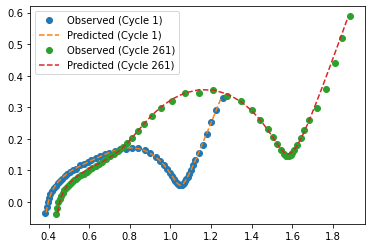

In [30]:
cellname = '25C01'
# Cell name list
# 25C01
# 25C02
# 25C03
# 25C04
# 25C05
# 25C06
# 25C07
# 25C08
# 35C01
# 35C02
# 45C01
# 45C02

datapath = './data/Cavendish/'

filename = f'{datapath}EIS_state_V_{cellname}.txt'

data = pd.read_csv(filename, delimiter='\t')
data.columns = data.columns.str.strip()

for cycle in [1, 261]:
    data_real = data[data['cycle number'] == cycle]['Re(Z)/Ohm'].values
    data_imag = data[data['cycle number'] == cycle]['-Im(Z)/Ohm'].values
    data_freq = data[data['cycle number'] == cycle]['freq/Hz'].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Cycle {cycle})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Cycle {cycle})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Cycle {cycle}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()

['./data/Tongji/NCA battery/CY25_0.25_1.xlsx', './data/Tongji/NCA battery/CY25_0.5_1.xlsx', './data/Tongji/NCA battery/CY25_1_1.xlsx', './data/Tongji/NCA battery/CY35_0.5_1.xlsx', './data/Tongji/NCA battery/CY45_0.5_1.xlsx']
Sheet 1_1RCPE
L     3.004776e-07
R0    3.000697e-07
R1    5.607532e+03
Q1    1.125193e+03
a1    1.000000e+00
R2    1.104072e+05
Q2    6.536999e+02
a2    3.800500e-02
Q3    3.182575e+01
a3    3.800568e-02
dtype: float64
Sheet 4_2RCPE
L     3.217836e-07
R0    3.115495e-02
R1    1.536933e-02
Q1    9.810486e-01
a1    6.027437e-01
R2    3.424186e-02
Q2    1.029119e+02
a2    6.196917e-01
Q3    9.611877e+02
a3    1.000000e+00
dtype: float64


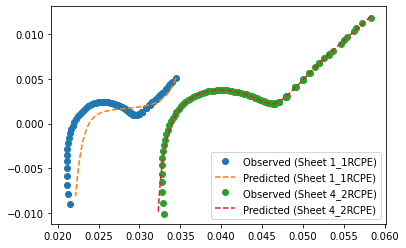

In [31]:
datapath = './data/Tongji/NCA battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[2]).sheet_names
for sheet in [sheet_names[0], sheet_names[3]]:
    data = pd.read_excel(filename[2], sheet_name=sheet)
    data_real = data["Data: Z'"].values
    data_imag = -data["Data: Z''"].values
    data_freq = data["Data: Frequency"].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Sheet {sheet})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Sheet {sheet})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Sheet {sheet}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()

['./data/Tongji/NCM battery/CY25_0.5_1.xlsx', './data/Tongji/NCM battery/CY35_0.5_1.xlsx', './data/Tongji/NCM battery/CY45_0.5_1.xlsx']
Sheet 1
L     5.092871e-07
R0    2.505270e-02
R1    1.836987e+03
Q1    3.251819e+02
a1    5.943491e-01
R2    9.264077e-03
Q2    5.205426e+00
a2    5.425588e-01
Q3    2.507639e+02
a3    2.374683e-07
dtype: float64
Sheet 9
L      5.301019e-07
R0     2.504301e-02
R1    2.043488e-162
Q1     1.006455e-22
a1     1.000000e+00
R2    1.364605e+161
Q2     1.953412e+24
a2    4.328231e-157
Q3     2.189401e+01
a3     1.853484e-01
dtype: float64


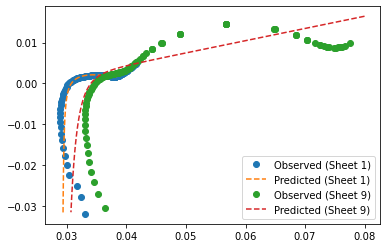

In [32]:
datapath = './data/Tongji/NCM battery/'

filename = sorted(glob.glob(f'{datapath}*.xlsx'))
print(filename)

sheet_names = pd.ExcelFile(filename[0]).sheet_names
for sheet in [sheet_names[0], sheet_names[8]]:
    data = pd.read_excel(filename[0], sheet_name=sheet)
    data_real = data["Data: Z'"].values
    data_imag = -data["Data: Z''"].values
    data_freq = data["Data: Frequency"].values
    plt.plot(
        data_real,
        data_imag,
        'o', label=f'Observed (Sheet {sheet})'
    )
    
    impedance = np.concatenate([data_real, data_imag])

    circuit_str = 'l-r-(r,cpe)-(r-cpe)-cpe'

    custom_initial_guess = np.ones(10)
    custom_initial_guess[1] = np.log(min(data_real))
    custom_initial_guess[0] = np.log(abs(data_imag[np.argmin(data_real)])/(2*np.pi*data_freq[np.argmin(data_real)]))
    circuit = Circuit(circuit_str, custom_initial_guess)

    circuit.fit(data_freq, impedance)
    impedance_pred = circuit.predict(data_freq)

    plt.plot(impedance_pred[:len(impedance_pred)//2], impedance_pred[len(impedance_pred)//2:], '--', label=f'Predicted (Sheet {sheet})')
    
    sigmoid_idx = np.zeros(len(circuit.parameters), dtype=int)
    sigmoid_idx[[4, 7, 9]] = 1
    print(f'Sheet {sheet}')
    print(pd.Series(np.where(sigmoid_idx,sigmoid(circuit.parameters),np.exp(circuit.parameters)), index=['L', 'R0', 'R1', 'Q1', 'a1', 'R2', 'Q2', 'a2', 'Q3', 'a3']))
    
plt.legend()
plt.show()